In [16]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import yfinance as yf

In [3]:
df_raw = yf.download("SPOT", start="2021-01-01", end="2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [4]:
df_raw.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04 00:00:00-05:00,317.420013,318.690002,305.510010,311.000000,311.000000,945700
2021-01-05 00:00:00-05:00,309.480011,316.149994,309.079987,313.720001,313.720001,610400
2021-01-06 00:00:00-05:00,308.160004,323.390015,307.035004,314.239990,314.239990,1024800
2021-01-07 00:00:00-05:00,317.440002,332.600006,316.250000,331.359985,331.359985,977200
2021-01-08 00:00:00-05:00,335.000000,354.600006,333.290009,353.109985,353.109985,2199700


In [5]:
df = df_raw.copy()

In [6]:
df.shape

(503, 6)

In [8]:
df['Avg'] = (df['High'] + df['Low'])/2

In [13]:
def check_missing_date(dataframe, column):
    df_result = pd.DataFrame(columns=['things', 'min_date', 'max_date', 'number_of_missing_date', 'number_of_not_missing_date', 'number_of_not_missing_date_should_be', 'gap'])
    print('How Much : ', len(dataframe[column].unique()))
    print('------------------------------------------------')
    for i in tqdm(dataframe[column].unique()):
        try:
            try:
                min_date = min(dataframe[dataframe[column]==i].DATE)
            except:
                min_date = min(dataframe[dataframe[column]==i].index)
            try:
                max_date = max(dataframe[dataframe[column]==i].DATE)
            except:
                max_date = max(dataframe[dataframe[column]==i].index)
            try:
                missing_date = pd.date_range(start=min(dataframe.DATE), end=max(dataframe.DATE), freq='W-MON').difference(dataframe[dataframe[column]==i].DATE)
                number_of_missing_date = len(missing_date)
            except:
                missing_date = pd.date_range(start=min(dataframe.index), end=max(dataframe.index), freq='W-MON').difference(dataframe[dataframe[column]==i].index)
                number_of_missing_date = len(missing_date)
#             try:
#                 not_missing_date = dataframe[dataframe[column]==i].DATE.difference(pd.date_range(start=min(dataframe.DATE), end=max(dataframe.DATE), freq='W-MON'))
#                 number_of_not_missing_date = len(not_missing_date)
#             except:
#                 not_missing_date = dataframe[dataframe[column]==i].index.difference(pd.date_range(start=min(dataframe.index), end=max(dataframe.index), freq='W-MON'))
#                 number_of_not_missing_date = len(not_missing_date)
            try:
                not_missing_date_should_be = pd.date_range(start=min_date, end=max_date, freq='W-MON')
                number_of_not_missing_date_should_be = len(not_missing_date_should_be)
            except:
                not_missing_date_should_be = pd.date_range(start=min_date, end=max_date, freq='W-MON')
                number_of_not_missing_date_should_be = len(not_missing_date_should_be)
            number_of_not_missing_date = len(dataframe[dataframe[column]==i].index.unique())
#             number_of_not_missing_date = 286 - number_of_missing_date
            gap = number_of_not_missing_date_should_be - number_of_not_missing_date
#             print('Thing : ', i)
#             print('Min : ', str(min_date))
#             print('Max : ', str(max_date))
#             print('Number of Missing Date : ', str(number_of_missing_date))
#             print('Missing Date List : ', missing_date)
#             print('------------------------------------------------')
            df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date, 
                                          'number_of_missing_date':number_of_missing_date, 'number_of_not_missing_date':number_of_not_missing_date,
                                          'number_of_not_missing_date_should_be':number_of_not_missing_date_should_be, 'gap':gap}, ignore_index=True)
        except:
            print('Pass')
    return df_result
    

In [14]:
# check_missing_date(df, 'Avg')

  0%|                                                                                          | 0/497 [00:00<?, ?it/s]<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pa

How Much :  497
------------------------------------------------


<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, '

 10%|████████▏                                                                       | 51/497 [00:00<00:03, 140.71it/s]<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pa

 17%|█████████████▋                                                                  | 85/497 [00:00<00:02, 155.82it/s]<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pa

<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
 24%|██████████████████▉                                                            | 119/497 [00:00<00:02, 161.08it/s]<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pa

<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, '

<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, '

 44%|██████████████████████████████████▍                                            | 217/497 [00:01<00:02, 133.05it/s]<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pa

 50%|███████████████████████████████████████▌                                       | 249/497 [00:01<00:01, 142.35it/s]<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pa

 57%|████████████████████████████████████████████▊                                  | 282/497 [00:01<00:01, 150.46it/s]<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pa

 63%|█████████████████████████████████████████████████▉                             | 314/497 [00:02<00:01, 148.64it/s]<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pa

 70%|██████████████████████████████████████████████████████▉                        | 346/497 [00:02<00:01, 144.90it/s]<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pa

<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, '

<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, '

<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, '

 99%|██████████████████████████████████████████████████████████████████████████████▎| 493/497 [00:03<00:00, 151.66it/s]<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-13-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pa

,things,min_date,max_date,number_of_missing_date,number_of_not_missing_date,number_of_not_missing_date_should_be,gap
0,312.100006,2021-01-04 00:00:00-05:00,2021-01-04 00:00:00-05:00,103,1,1,0
1,312.614990,2021-01-05 00:00:00-05:00,2021-01-05 00:00:00-05:00,104,1,0,-1
2,315.212509,2021-01-06 00:00:00-05:00,2021-01-06 00:00:00-05:00,104,1,0,-1
3,324.425003,2021-01-07 00:00:00-05:00,2021-01-07 00:00:00-05:00,104,1,0,-1
4,343.945007,2021-01-08 00:00:00-05:00,2021-01-08 00:00:00-05:00,104,1,0,-1
...,...,...,...,...,...,...,...
492,77.185001,2022-12-23 00:00:00-05:00,2022-12-23 00:00:00-05:00,104,1,0,-1
493,75.424999,2022-12-27 00:00:00-05:00,2022-12-27 00:00:00-05:00,104,1,0,-1
494,77.154999,2022-12-28 00:00:00-05:00,2022-12-28 00:00:00-05:00,104,1,0,-1
495,78.566502,2022-12-29 00:00:00-05:00,2022-12-29 00:00:00-05:00,104,1,0,-1


In [17]:
def plot_line(data, cols =[]):
    for col in cols:
        plt.figure(figsize=(20, 5))
        plt.plot(data[col])
        plt.grid(color='black')
        plt.title(col)
        plt.xticks(rotation=90)
        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        plt.show()

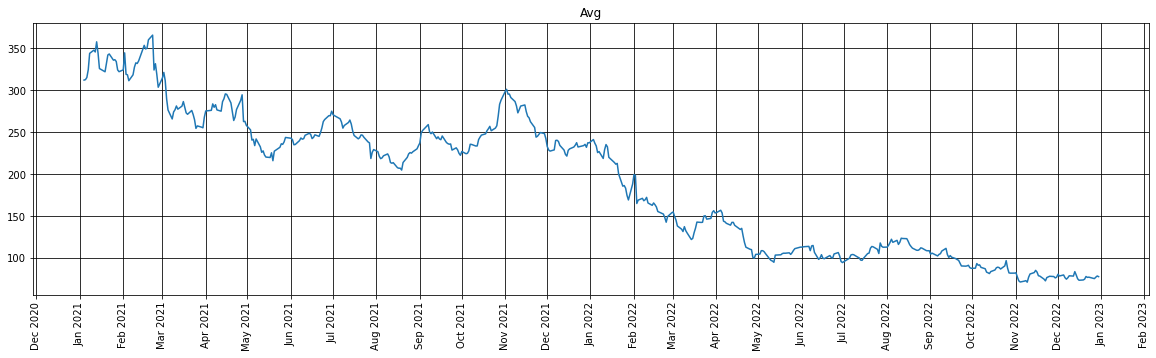

In [18]:
plot_line(df,['Avg'])

<h2>Stationarity Check</h2>

In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Avg'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

AttributeError: module 'numpy' has no attribute 'MachAr'

In [ ]:
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

<h2>Granger Causality</h2>

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(df_agg_loreal[numeric_col], maxlag=4)
#p-value<0.05 => reject H0 => Media Cost (Original) influence Impressions

<h2>Modeling</h2>